In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

reddit_data = pd.read_csv("reddit_train.csv") #train data
df = pd.DataFrame(reddit_data) #train data
reddit_data_copy = reddit_data.copy() #train data
reddit_data_copy = reddit_data_copy.drop(columns=["subreddits"]) #train data
X = reddit_data_copy[reddit_data_copy.columns[1]]  #raw comments

train_comments_list = []
for i in range(len(X.index)):
    train_comments_list.append(X.iloc[i])
train_comments_list = list(train_comments_list)
train_comments_list = np.array(train_comments_list)


Y = reddit_data[reddit_data.columns[-1]]
y_modified = []         #raw classes
train_subreddits_class = []    #important, class in integer
for i in range(len(Y.index)):
    y_modified.append(Y.loc[i])
for i in range(len(y_modified)):
    if y_modified[i] == 'hockey':
        train_subreddits_class.append(1)
    elif y_modified[i] == 'nba':
        train_subreddits_class.append(2)
    elif y_modified[i] == 'leagueoflegends':
        train_subreddits_class.append(3)
    elif y_modified[i] == 'soccer':
        train_subreddits_class.append(4)
    elif y_modified[i] == 'funny':
        train_subreddits_class.append(5)
    elif y_modified[i] == 'movies':
        train_subreddits_class.append(6)
    elif y_modified[i] == 'Overwatch':
        train_subreddits_class.append(7)
    elif y_modified[i] == 'anime':
        train_subreddits_class.append(8)
    elif y_modified[i] == 'trees':
        train_subreddits_class.append(9)
    elif y_modified[i] == 'GlobalOffensive':
        train_subreddits_class.append(10)
    elif y_modified[i] == 'nfl':
        train_subreddits_class.append(11)
    elif y_modified[i] == 'AskReddit':
        train_subreddits_class.append(12)
    elif y_modified[i] == 'gameofthrones':
        train_subreddits_class.append(13)
    elif y_modified[i] == 'conspiracy':
        train_subreddits_class.append(14)
    elif y_modified[i] == 'worldnews':
        train_subreddits_class.append(15)
    elif y_modified[i] == 'wow':
        train_subreddits_class.append(16)
    elif y_modified[i] == 'europe':
        train_subreddits_class.append(17)
    elif y_modified[i] == 'canada':
        train_subreddits_class.append(18)
    elif y_modified[i] == 'Music':
        train_subreddits_class.append(19)
    elif y_modified[i] == 'baseball':
        train_subreddits_class.append(20)
train_subreddits_class = np.array(train_subreddits_class)
X_train = train_comments_list
y_train = train_subreddits_class

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from sklearn.preprocessing import normalize

lem = WordNetLemmatizer()
tknzr = WordPunctTokenizer()
stem = PorterStemmer()
replace_by_space = re.compile('[/(){}\[\]\|@,;!.#><?""''%$^*`:]')
stop_words = set(stopwords.words('english'))
unused_char = re.compile('[^0-9a-zA-Z]')

for i in range(len(X_train)):
    X_train[i] = X_train[i].lower()
    X_train[i] = replace_by_space.sub(' ', X_train[i])
    X_train[i] = unused_char.sub(' ', X_train[i])
    X_train[i] = ' '.join(lem.lemmatize(word) for word in X_train[i].split() if word not in stop_words)

tf_idf_vectorizer = TfidfVectorizer(stop_words = set(stopwords.words('english')), max_df = 1.0, ngram_range=(1, 3), min_df = 0.000005, analyzer='word',binary=True, tokenizer = WordPunctTokenizer().tokenize)
vectors_train_idf = tf_idf_vectorizer.fit_transform(X_train)

terms = tf_idf_vectorizer.get_feature_names()
vectors_train_nomalized = normalize(vectors_train_idf)

/Users/theone/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'"] not in stop_words.
  'stop_words.' % sorted(inconsistent))


2360876
70000
(70000, 2360876)


In [3]:
#from sklearn.feature_selection import GenericUnivariateSelect, chi2, f_classif
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, mutual_info_classif
skb = SelectKBest(chi2, k=70000)
vectors_train_idf_normalized_selected = skb.fit_transform(vectors_train_nomalized, y_train)

/Users/theone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/theone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/theone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/theone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/theone/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

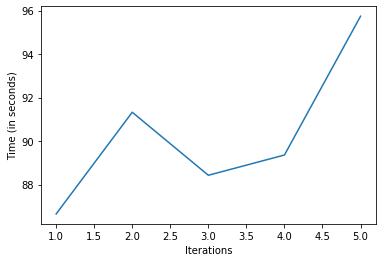

90.30194205420085


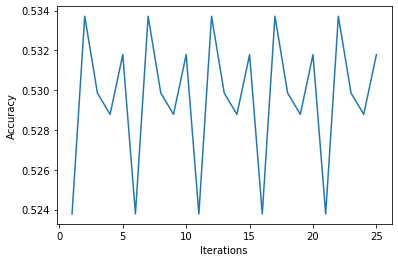

[0.52378571 0.53371429 0.52985714 0.52878571 0.53178571]
0.5295857142857143


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import timeit
import matplotlib.pyplot as plt
%matplotlib inline


#start = timeit.default_timer()
clf_lr = LogisticRegression()
timeArray = []
scoreArray = []
for i in range(5):
    start = timeit.default_timer()
    scores = cross_val_score(clf_lr, vectors_train_idf_normalized_selected, y_train, cv=5, scoring='accuracy')
    stop = timeit.default_timer()
    time = stop - start
    
    for j in range(5):
        scoreArray.append(scores[j])
    timeArray.append(time)

iterations1 = [1,2,3,4,5]
plt.plot(iterations1, timeArray)
plt.xlabel('Iterations')
plt.ylabel('Time (in seconds)')
plt.show()


a = np.array(timeArray)
print(np.mean(a))
    

iterations2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

plt.plot(iterations2, scoreArray)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()
# print(scoreArray)


print(scores)
print(scores.mean())


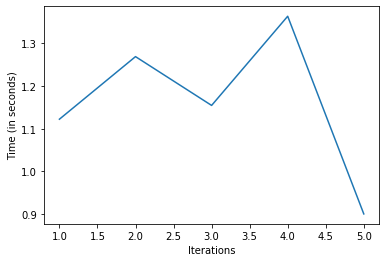

1.1620056300002033


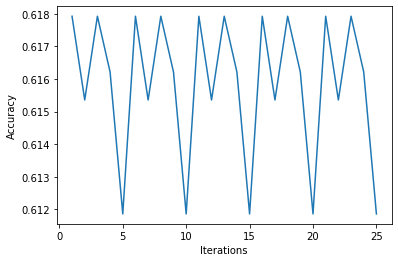

[0.61792857 0.61535714 0.61792857 0.61621429 0.61185714]
0.6158571428571428


In [5]:
#MNB
#from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


clf_nb = MultinomialNB(alpha=0.00001)
timeArray = []
scoreArray = []
for i in range(5):
    
    start = timeit.default_timer()
    scores = cross_val_score(clf_nb, vectors_train_idf_normalized_selected, y_train, cv=5, scoring='accuracy')
    stop = timeit.default_timer()
    time = stop - start
    
    for j in range(5):
        scoreArray.append(scores[j])
    timeArray.append(time)
    
iterations1 = [1,2,3,4,5]
plt.plot(iterations1, timeArray)
plt.xlabel('Iterations')
plt.ylabel('Time (in seconds)')
plt.show()

a = np.array(timeArray)
print(np.mean(a))
    

iterations2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

plt.plot(iterations2, scoreArray)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

print(scores)
print(scores.mean())

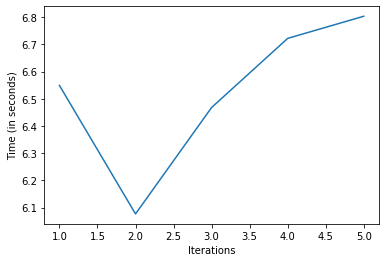

6.524074700009078


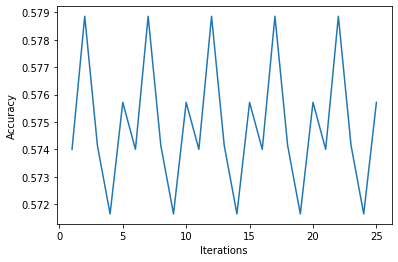

[0.574      0.57885714 0.57414286 0.57164286 0.57571429]
0.5748714285714286


In [48]:
from sklearn import linear_model


class_weights = {1: 0.9, 2:0.7, 3:0.7, 4:0.9, 5:1.5, 6:0.9, 7:0.5, 8:0.9, 9:1, 10:0.8, 11:0.9, 12:1.5, 13:0.1, 14:1.2, 15:1.2, 16:0.1, 17:1.2, 18:1.2, 19:0.5, 20:0.9}

timeArray = []
scoreArray = []
clf_SDG = linear_model.SGDClassifier(max_iter=1000, tol=1e-3, class_weight=class_weights, penalty='l2', alpha=0.0001, random_state=0)

for i in range(5):
    
    start = timeit.default_timer()
    scores = cross_val_score(clf_SDG, vectors_train_idf_normalized_selected, y_train, cv=5, scoring='accuracy')
    stop = timeit.default_timer()
    time = stop - start
    
    for j in range(5):
        scoreArray.append(scores[j])
    timeArray.append(time)

    
iterations1 = [1,2,3,4,5]
plt.plot(iterations1, timeArray)
plt.xlabel('Iterations')
plt.ylabel('Time (in seconds)')
plt.show()

a = np.array(timeArray)
print(np.mean(a))
    

iterations2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

plt.plot(iterations2, scoreArray)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()
    

print(scores)
print(scores.mean())

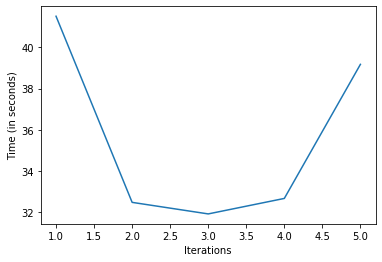

[41.50278551701922, 32.49078785593156, 31.93138755194377, 32.681168137001805, 39.1731392769143]
35.55585366776213


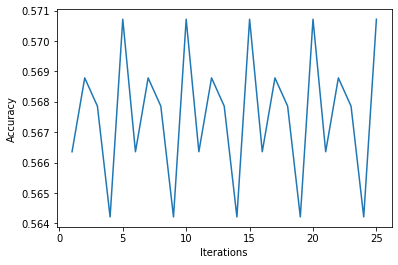

[0.56635714 0.56878571 0.56785714 0.56421429 0.57071429]
0.5675857142857142


In [49]:
from sklearn.svm import LinearSVC

timeArray = []
scoreArray = []
clf_svc = LinearSVC(random_state=0, tol=1e-5, class_weight=class_weights)

for i in range(5):
    
    start = timeit.default_timer()
    scores = cross_val_score(clf_svc, vectors_train_idf_normalized_selected, y_train, cv=5, scoring='accuracy')
    stop = timeit.default_timer()
    time = stop - start
    
    for j in range(5):
        scoreArray.append(scores[j])
    timeArray.append(time)
    
iterations1 = [1,2,3,4,5]
plt.plot(iterations1, timeArray)
plt.xlabel('Iterations')
plt.ylabel('Time (in seconds)')
plt.show()
print(timeArray)

a = np.array(timeArray)
print(np.mean(a))
    


iterations2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

plt.plot(iterations2, scoreArray)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()
    
    
print(scores)
print(scores.mean())


In [54]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

start = timeit.default_timer()
clf_mlp = MLPClassifier(alpha = 0.00001, learning_rate = 'adaptive', learning_rate_init = 0.005, early_stopping = True, max_iter = 100, activation = 'relu', random_state=0)
scores = cross_val_score(clf_mlp, vectors_train_idf_normalized_selected, y_train, cv=5, scoring='accuracy')
stop = timeit.default_timer()


print(scores)
print(scores.mean())
print('Time: ', stop - start) 

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[0.61278571 0.61721429 0.60942857 0.61335714 0.6155    ]
0.6136571428571428
Time:  1499.7948153809411


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
